# Supervised Learning - Bias Variance tradeoff

This notebook introduces to predicition and basic model evaluation concepts.

Usually we only care for the ouput of the model, not how it gets. So in this case it is important that our model is robust to unseen data. Thus, to simulate the situation we need to divide the data into 2 parts. On one part we should make the model and on the other part we should test its performance. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
# Let's make a simulated data
X = np.random.randint(100,size = 100)
X = X-X.mean()
Y = 0.0003*X**2+2*np.random.random(size = 100)

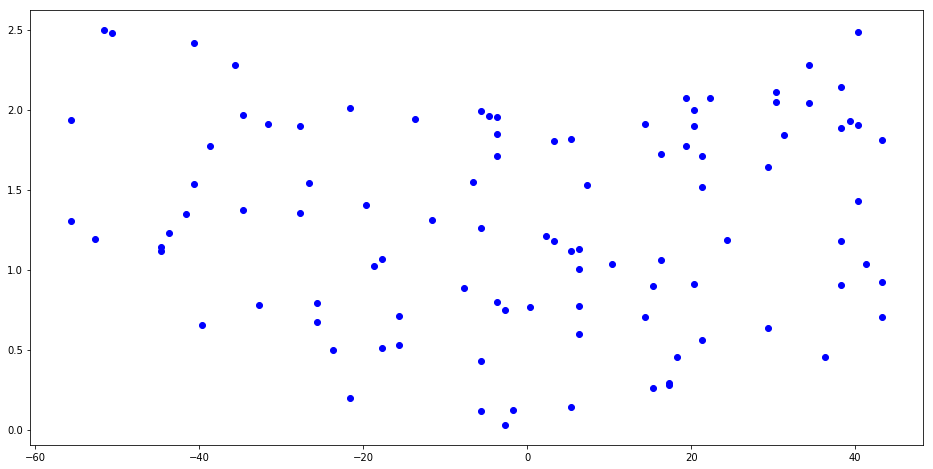

In [0]:
plt.figure(figsize = (16,8))
plt.plot(X,Y,'bo')
plt.show()

We can split data into two parts namely Train and test. We will make our model on train dataset and make evaluation on test dataset.

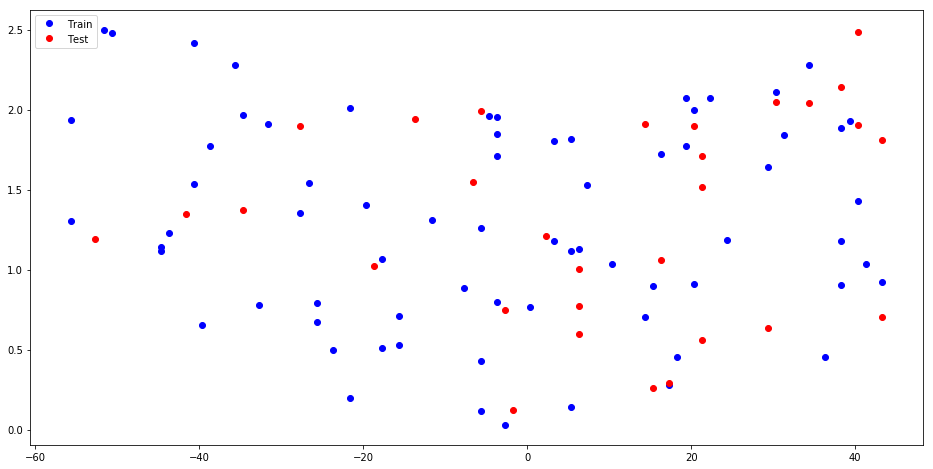

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, shuffle = False)
plt.figure(figsize = (16,8))
plt.plot(X_train,Y_train,'bo', label = 'Train')
plt.plot(X_test,Y_test,'ro', label = 'Test')
plt.legend()
plt.show()

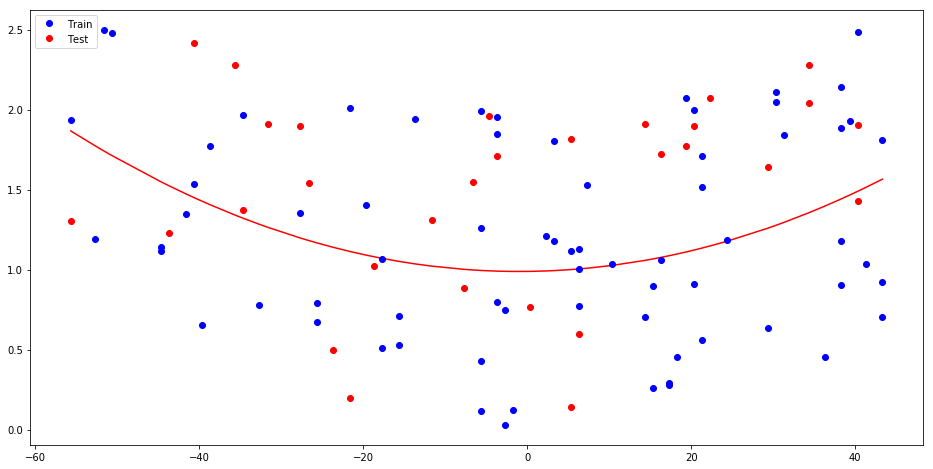

Train error: 0.348874654654013 
 Test error: 0.4211405803036685


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

# Fitting a second degree curve i.e. y = a + bX + cX^2
poly = np.poly1d(np.polyfit(X_train,Y_train,deg = 2))
plt.figure(figsize = (16,8))
plt.plot(sorted(X),poly(sorted(X)),'r')
plt.plot(X_train,Y_train,'bo', label = 'Train')
plt.plot(X_test,Y_test,'ro', label = 'Test')
plt.legend()
plt.show()
mse_train = (np.square(poly(X_train) - Y_train)).mean()
mse_test = (np.square(poly(X_test) - Y_test)).mean()
print('Train error:',mse_train,'\n','Test error:', mse_test)

The goal usually is to get lower test error than other models/studies. 

Now let's consider we don't know what is the functional relationship (which is the case in real scenarios).
How should we decide what is the functional form. 

Let's experiment with our simulated dataset.

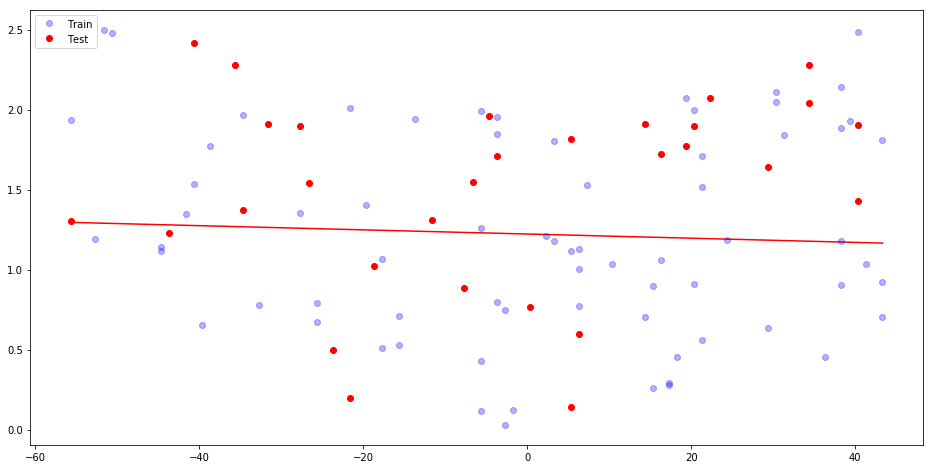

Train error: 0.40183381948456465 
 Test error: 0.4392732270621659 
 Degree of fit: 1


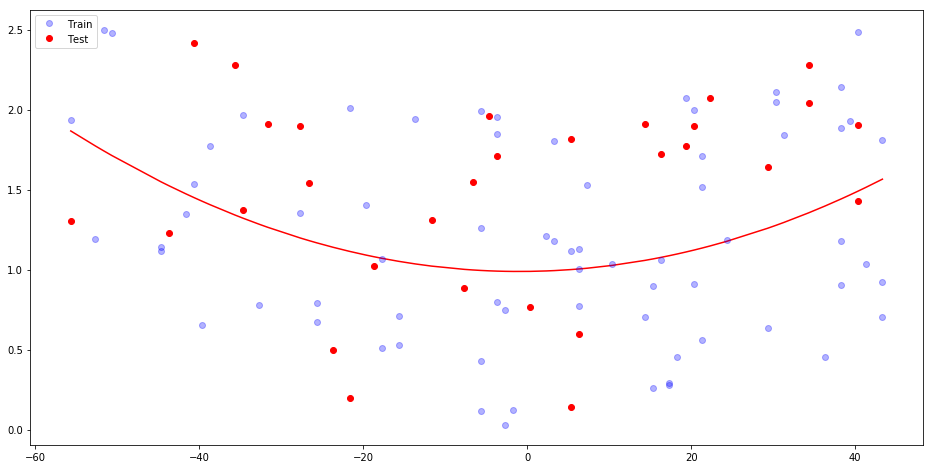

Train error: 0.348874654654013 
 Test error: 0.4211405803036685 
 Degree of fit: 2


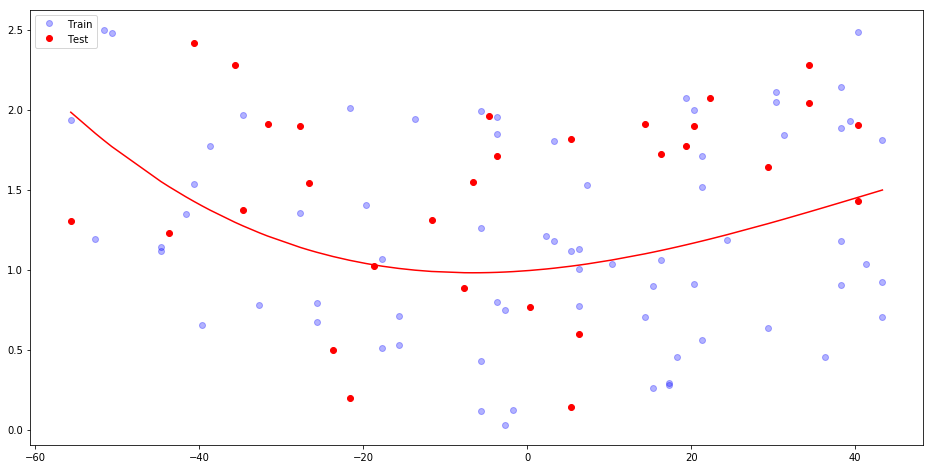

Train error: 0.3472059744659679 
 Test error: 0.42372830462729666 
 Degree of fit: 3


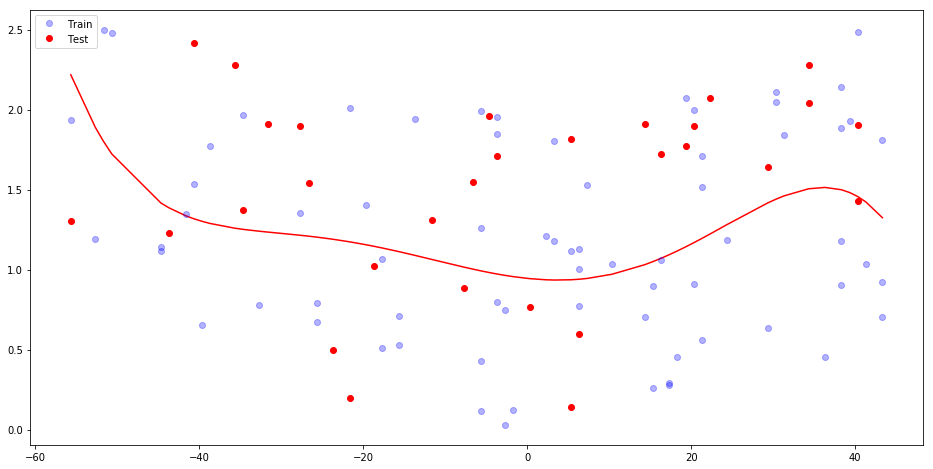

Train error: 0.33945474291251265 
 Test error: 0.4329442236392817 
 Degree of fit: 5


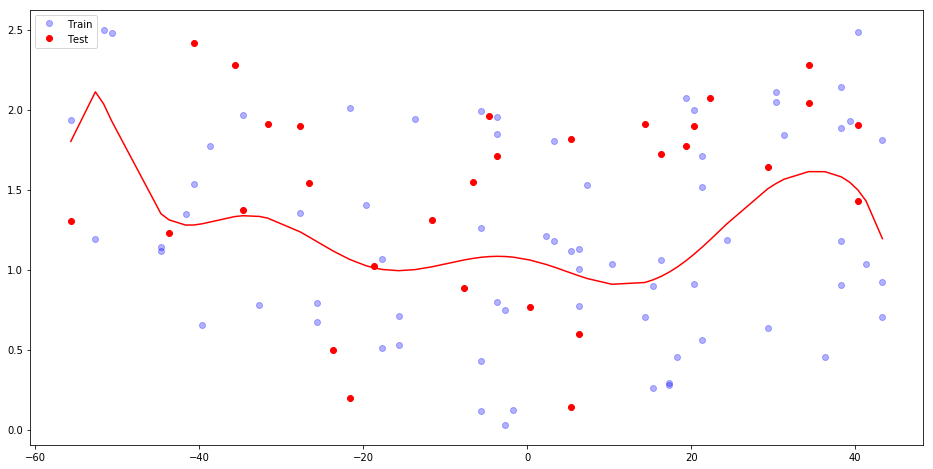

Train error: 0.32754006342476166 
 Test error: 0.3969333974552312 
 Degree of fit: 10


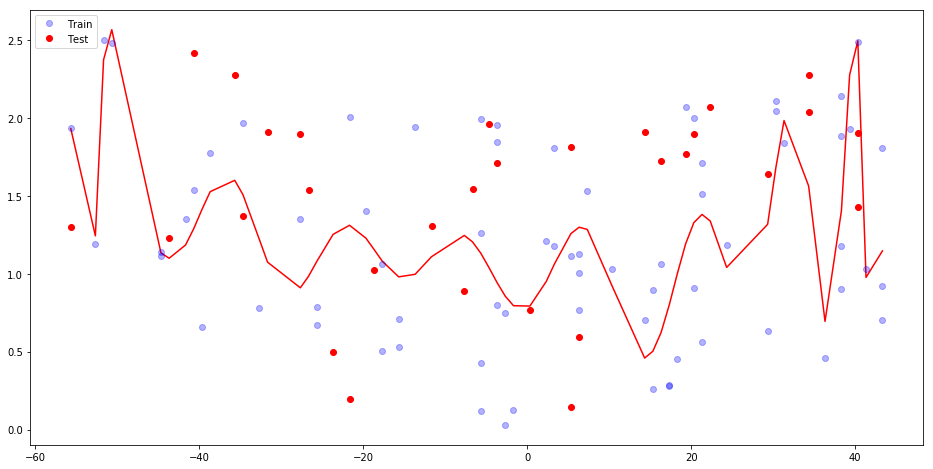

Train error: 0.23284335326884015 
 Test error: 0.5525829077369883 
 Degree of fit: 20


C:\Users\Mher_Matevosyan\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


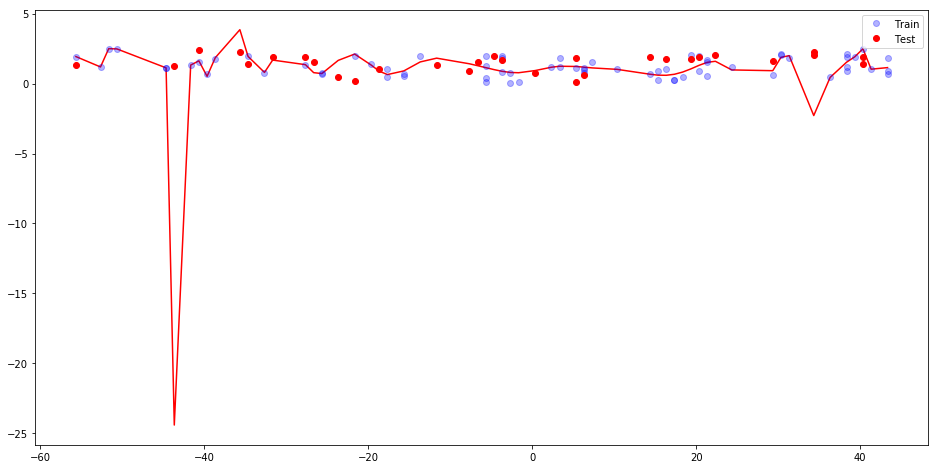

Train error: 0.1735343682960846 
 Test error: 23.890583798515756 
 Degree of fit: 40


C:\Users\Mher_Matevosyan\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


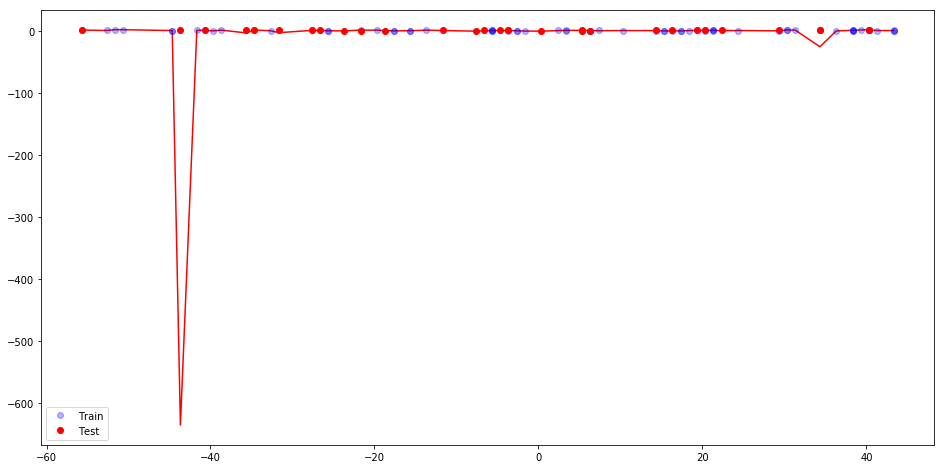

Train error: 0.14818404524941098 
 Test error: 13571.720797866337 
 Degree of fit: 70


C:\Users\Mher_Matevosyan\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


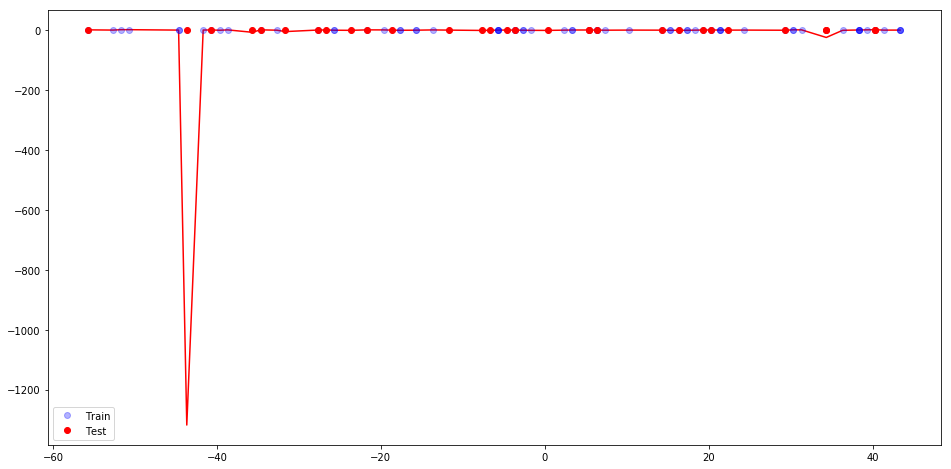

Train error: 0.14838170923138563 
 Test error: 58095.253733601356 
 Degree of fit: 80


In [0]:
for i in [1,2,3,5,10,20,40,70,80]:
    poly = np.poly1d(np.polyfit(X_train,Y_train,deg = i))
    plt.figure(figsize = (16,8))
    plt.plot(sorted(X),poly(sorted(X)),'r')
    plt.plot(X_train,Y_train,'bo',alpha = 0.3, label = 'Train')
    plt.plot(X_test,Y_test,'ro', label = 'Test')
    plt.legend()
    plt.show()
    mse_train = (np.square(poly(X_train) - Y_train)).mean()
    mse_test = (np.square(poly(X_test) - Y_test)).mean()
    print('Train error:',mse_train,'\n','Test error:', mse_test,'\n','Degree of fit:',i)

As you can see Test error increases drastically with degrees of polynomial fit

So by increasing model complexity you might make the model to _overfit_. However, both training error and test error were high when we considered only simple linear fit. That means the model was _underfitting_. There are no hardcoded rules what kind of complexity to model. One might say it is kind of art, to use some tricks and insights from data to model with right amount of complexity.

### Bias-Variance tradeoff

We know that population coefficient for $X^2$ is 0.0003. So let's keep other coefficients as they are , and change that coefficient and see how it relates to MSE.

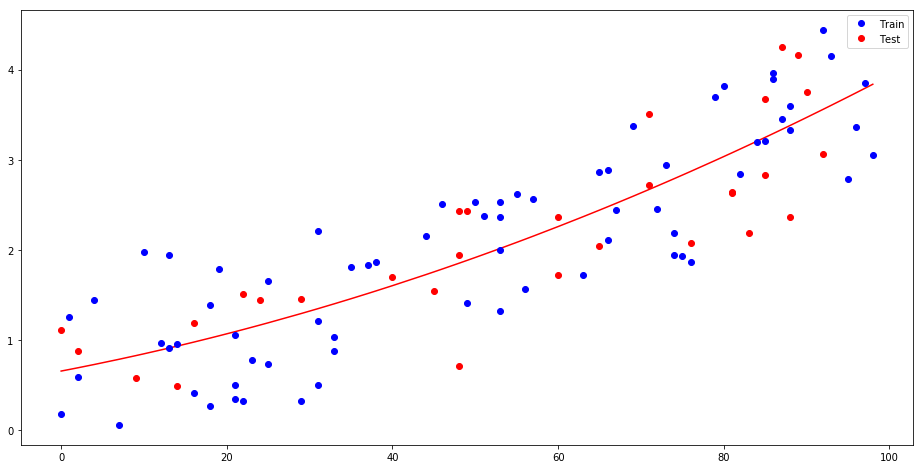

Train error: 0.33144120506733216 
 Test error: 0.30157172193821136


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

# Fitting a second degree curve i.e. y = a + bX + bX^2
poly = np.poly1d(np.polyfit(X_train,Y_train,deg = 2))
plt.figure(figsize = (16,8))
plt.plot(sorted(X),poly(sorted(X)),'r')
plt.plot(X_train,Y_train,'bo', label = 'Train')
plt.plot(X_test,Y_test,'ro', label = 'Test')
plt.legend()
plt.show()
mse_train = (np.square(poly(X_train) - Y_train)).mean()
mse_test = (np.square(poly(X_test) - Y_test)).mean()
print('Train error:',mse_train,'\n','Test error:', mse_test)

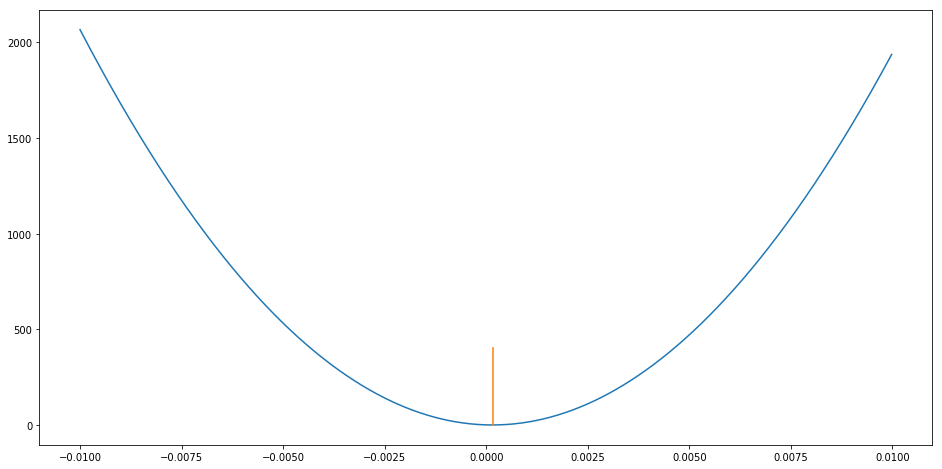

Min MSE coef: 0.00016000000000000042


In [0]:
# plotting mse depending on coefficient of X^2
coef_vals = []
mse_vals = []
for i in range(1000):
    coef = -0.01+i/50000
    coef_vals.append(coef)
    poly[2] = coef
    mse = (np.square(poly(X_train) - Y_train)).mean()
    mse_vals.append(mse)
coef_min_mse = coef_vals[np.argmin(mse_vals)]
plt.figure(figsize = (16,8))
plt.plot(coef_vals,mse_vals)
plt.plot([coef_min_mse,coef_min_mse],[0,np.min(mse_vals)+400])
plt.show()
print('Min MSE coef:',coef_min_mse)

Now let's see how MSE changes depending on model complexity.

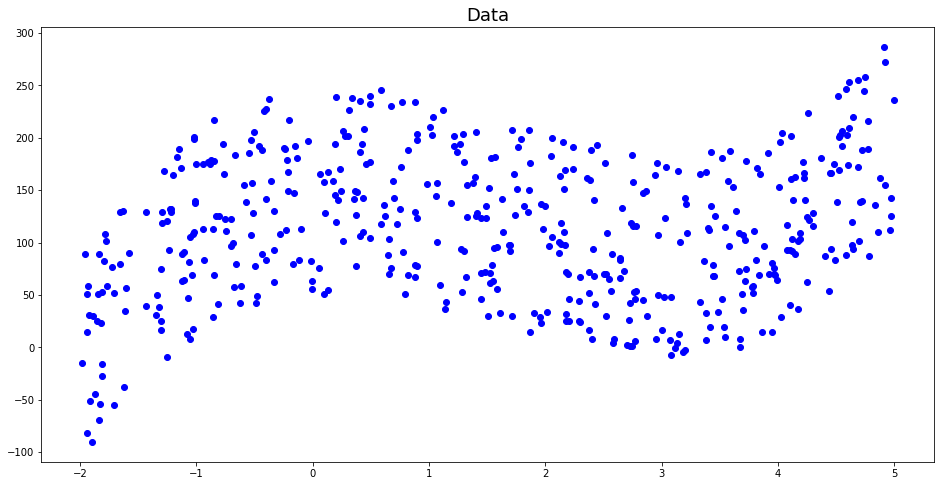

C:\Users\Mher_Matevosyan\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]
C:\Users\Mher_Matevosyan\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]
C:\Users\Mher_Matevosyan\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]
C:\Users\Mher_Matevosyan\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


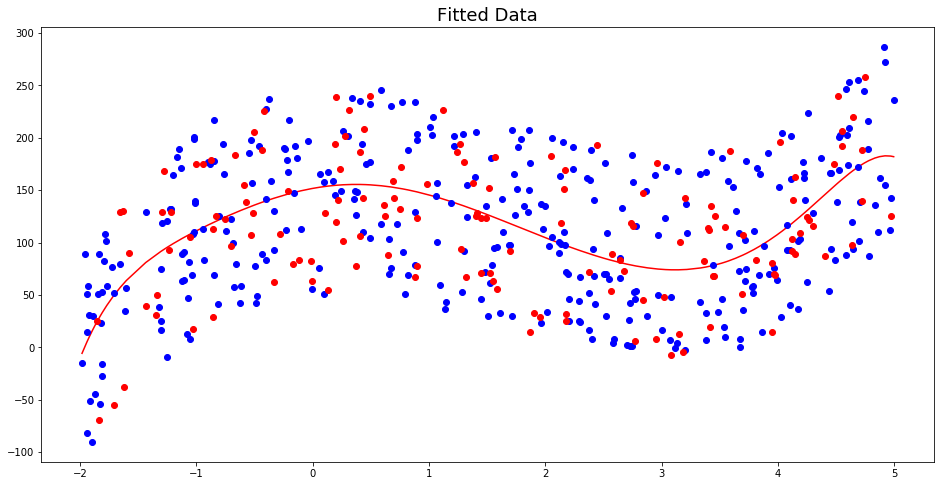

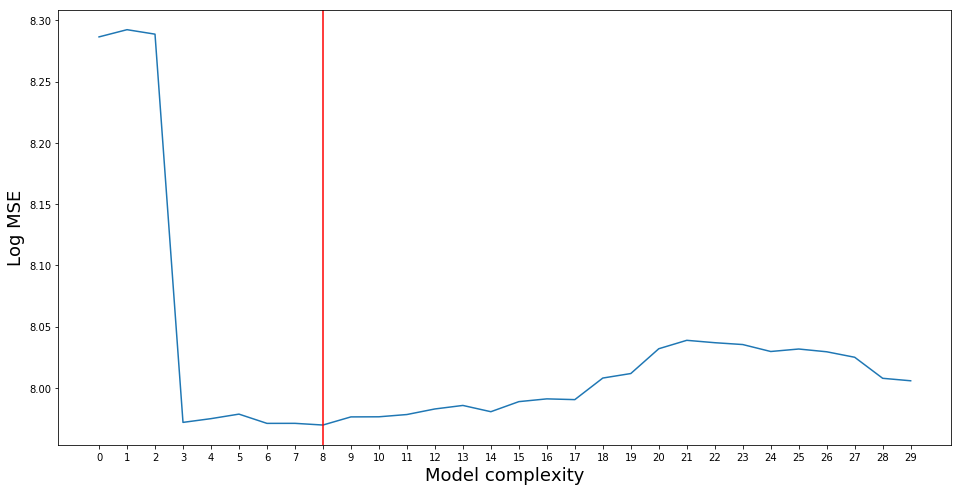

Real: 
     3      2 
 5 x - 25 x + 10 x  + 50
Fitted: 
           8          7          6          5         4         3
-0.01484 x + 0.1822 x - 0.7633 x + 0.8234 x + 3.199 x - 4.059 x
          2
 - 25.78 x + 20.2 x + 151.7


In [0]:
# Let's make a simulated data
X = 7*np.random.random(size = 500)-2
Y = 50 + 10*X-25*X**2+5*X**3+200*np.random.random(size = 500)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

plt.figure(figsize = (16,8))
plt.plot(X,Y,'bo')
plt.title('Data', fontsize = 18)
plt.show()

poly_losses = []
for i in range(30):
    poly = np.poly1d(np.polyfit(X_train,Y_train,deg = i))
    mse_train = (np.square(poly(X_test) - Y_test)).mean()
    poly_losses.append(mse_train)

poly = np.poly1d(np.polyfit(X_train,Y_train,deg = np.argmin(poly_losses)))
plt.figure(figsize = (16,8))
plt.plot(sorted(X_train),poly(sorted(X_train)),'r')
plt.plot(X_train,Y_train,'bo', label = 'Train')
plt.plot(X_test,Y_test,'ro', label = 'Test')
plt.title('Fitted Data', fontsize = 18)
plt.show()
    
plt.figure(figsize = (16,8))    
plt.plot(np.log(poly_losses)) # for visual purposes
plt.axvline(np.argmin(poly_losses), c = 'r')
plt.xlabel('Model complexity', fontsize = 18)
plt.ylabel('Log MSE', fontsize = 18)
plt.xticks(range(30))
plt.show()
print('Real: \n', '    3      2 \n 5 x - 25 x + 10 x  + 50')
print('Fitted: \n',poly)


Suppose we know what is real functional form. MSE can be decomposed by having this information.

$y$ -  observed<br>
$f$ - real relationship<br>
$\hat{f}$ - estimated relationship<br>
$$y = f+\varepsilon$$<br>
$$MSE = E[(y-\hat{f})^2] = E[(f+\varepsilon-\hat{f})^2]=$$<br>
$$= E[(f+\varepsilon-\hat{f} + E(\hat{f}) - E(\hat{f}))^2]=$$<br>
$$= E[([f+\varepsilon - E(\hat{f})] + [E(\hat{f}) -\hat{f}])^2]=$$<br>
$$= E[([f - E(\hat{f})]^2 +\varepsilon^2+2\varepsilon[f - E(\hat{f})]+ E(\hat{f})^2 +\hat{f}^2-2\hat{f}E(\hat{f})]=$$<br>
$$= E([f - E(\hat{f})]^2) +E(\varepsilon^2)+ E(\hat{f})^2 +E(\hat{f}^2)-2E(\hat{f})^2=$$<br>
$$= E([f - E(\hat{f})]^2) +\sigma^2+ E(\hat{f}^2)-E(\hat{f})^2=$$<br>
$$= Bias(\hat{f})^2 +\sigma^2+ Var(\hat{f})$$

Model Bias and Variance are theoretical basis for under/overfitting. Bias shows on average (repeating experiment for infinetly many datasets and averaging results) how well model is predicting, while variance shows how much the model varies in its predicitons (repeating experiment for infintely many datasets and calculating the variation in predictions).

In [0]:
%%time
np.random.seed(1234)
polies = []
for i in range(10_000):
    
    X_train = 7*np.random.random(size = 200)-2
    Y_train = 50 + 10*X_train-25*X_train**2+5*X_train**3+200*np.random.random(size = 200)

    poly_iterations = []
    for i in range(20):
        poly = np.poly1d(np.polyfit(X_train,Y_train,deg = i))        
        poly_iterations.append(poly)
    polies.append(poly_iterations)
polies = np.array(polies)

Wall time: 1min 22s


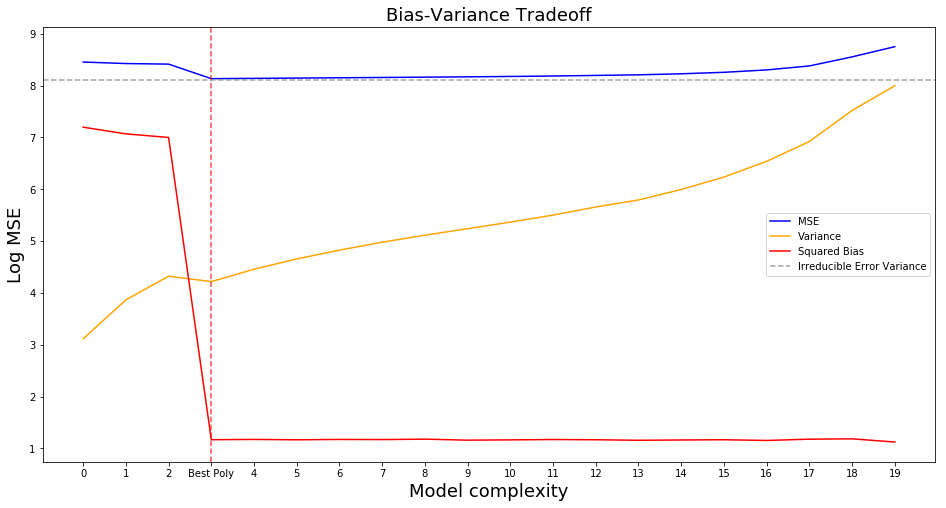

Note: Sometimes Bias might be negative if we remove random.seed, might be numerical problem, or low sample problem
Wall time: 6min 28s


In [0]:
%%time
# Generate test set
np.random.seed(1234)
X_test = 7*np.random.random(size = 20_000)-2
Y_test = 50 + 10*X_test-25*X_test**2+5*X_test**3+200*np.random.random(size = 20_000)
# Calculate irreducible error
var_e = np.var(200*np.random.random(size = 10_000_000))

poly_losses = []
expected_f_hats = []
variance_f_hats = []
for i in range(20):
    
    preds = np.array([p(X_test) for p in polies[:,i]])
    mses = np.square(preds-Y_test).mean(axis = 1).mean(axis = 0)
    poly_losses.append(mses)
    
    expected = preds.mean(axis = 0)
    expected_f_hat_w_e = np.square(expected - Y_test).mean()
    expected_f_hat = expected_f_hat_w_e - var_e # squared bias
    expected_f_hats.append(expected_f_hat)
    variance_f_hat = np.square(preds-expected).mean() # model variance
    variance_f_hats.append(variance_f_hat)
    
    
plt.figure(figsize = (16,8))    
plt.plot(np.log(poly_losses),'blue', label = 'MSE')
plt.plot(np.log(variance_f_hats),'orange', label = 'Variance')
plt.plot(np.log(expected_f_hats),'red', label = 'Squared Bias')
plt.axvline(np.argmin(poly_losses), c = 'r', linestyle = '--', alpha = 0.7)
plt.axhline(np.log(var_e), c = 'grey', linestyle = '--', alpha = 0.7, label = 'Irreducible Error Variance')
plt.xlabel('Model complexity', fontsize = 18)
plt.ylabel('Log MSE', fontsize = 18)
ticks = [str(i) for i in range(20)]
ticks[np.argmin(poly_losses)] = 'Best Poly'
plt.xticks(range(20),ticks)
plt.title('Bias-Variance Tradeoff', fontsize = 18)
plt.legend()
plt.show()
print('Note: Sometimes Bias might be negative if we remove random.seed, might be numerical problem, or low sample problem')